In [1]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from dmba import regressionSummary, classificationSummary

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import BayesianRidge
import matplotlib.pylab as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="Set2", rc=custom_params)

In [2]:
area_df=pd.read_csv("fulfilment_center_info.csv")
area_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


<AxesSubplot:>

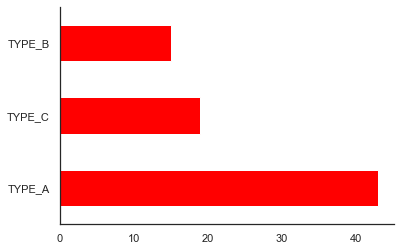

In [3]:
area_df['center_type'].value_counts().plot(kind='barh',color="red")

In [4]:
print("Number of different centers from where the order dispatched")
len(area_df['center_id'].unique())

Number of different centers from where the order dispatched


77

In [5]:
meal_df=pd.read_csv("meal_info.csv")
meal_df.head(7)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian


In [6]:
meal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


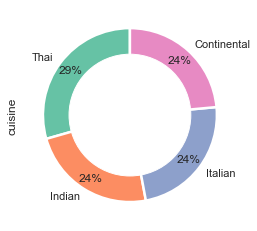

In [7]:
meal_df['cuisine'].value_counts().plot(kind='pie',autopct='%0.0f%%',startangle=90, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : 'white' }, pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.70, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:>

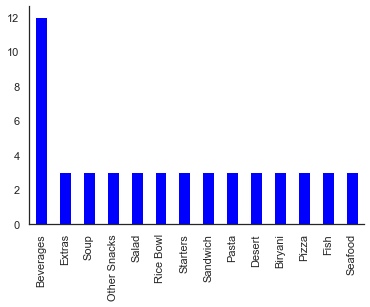

In [8]:
meal_df['category'].value_counts().plot(kind='bar',color="blue")

In [9]:
df=pd.read_csv("Food demand.csv")
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271
...,...,...,...,...,...,...,...,...,...
1994,1002177,89,72,1311,130.04,177.51,0,0,68
1995,1002178,24,50,2444,604.31,606.31,0,0,109
1996,1002179,43,88,1971,291.06,291.06,0,0,366
1997,1002180,107,58,1543,473.39,473.39,0,1,42


In [10]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.001093e+06,75.393197,81.649825,2010.123562,327.302596,347.972866,0.076538,0.105053,258.340170
std,6.323493e+02,41.743802,46.139173,554.686525,150.906902,158.625091,0.265924,0.306698,413.743045
min,1.000000e+06,1.000000,10.000000,1062.000000,65.020000,93.120000,0.000000,0.000000,13.000000
25%,1.000546e+06,40.000000,43.000000,1543.000000,222.645000,242.530000,0.000000,0.000000,55.000000
50%,1.001094e+06,78.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,148.000000
75%,1.001638e+06,111.500000,110.000000,2539.000000,435.530000,447.230000,0.000000,0.000000,324.000000
max,1.002181e+06,145.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,12137.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1999 non-null   int64  
 1   week                   1999 non-null   int64  
 2   center_id              1999 non-null   int64  
 3   meal_id                1999 non-null   int64  
 4   checkout_price         1999 non-null   float64
 5   base_price             1999 non-null   float64
 6   emailer_for_promotion  1999 non-null   int64  
 7   homepage_featured      1999 non-null   int64  
 8   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [12]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [13]:
df=df.drop(columns=['emailer_for_promotion','homepage_featured'])

In [14]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders
0,1000000,3,157,2760,233.83,231.83,149
1,1000001,100,104,2956,486.03,583.03,161
2,1000002,143,75,1971,328.86,327.86,149
3,1000003,41,24,2539,145.53,145.53,540
4,1000004,45,83,2539,95.06,120.34,271


In [15]:
df=pd.merge(df,area_df,on='center_id')

In [16]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area
0,1000000,3,157,2760,233.83,231.83,149,609,93,TYPE_A,4.1
1,1000251,126,157,2306,338.53,340.53,15,609,93,TYPE_A,4.1
2,1000336,16,157,2492,445.23,447.23,55,609,93,TYPE_A,4.1
3,1000406,103,157,1109,192.09,339.50,68,609,93,TYPE_A,4.1
4,1000520,128,157,1230,363.78,363.78,190,609,93,TYPE_A,4.1


In [17]:
df=pd.merge(df,meal_df,on='meal_id')

In [18]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1000000,3,157,2760,233.83,231.83,149,609,93,TYPE_A,4.1,Other Snacks,Thai
1,1001086,144,157,2760,184.36,261.93,96,609,93,TYPE_A,4.1,Other Snacks,Thai
2,1001863,120,157,2760,219.28,241.53,27,609,93,TYPE_A,4.1,Other Snacks,Thai
3,1000867,38,24,2760,242.53,242.53,204,614,85,TYPE_B,3.6,Other Snacks,Thai
4,1001080,131,83,2760,260.93,260.93,107,659,77,TYPE_A,5.3,Other Snacks,Thai


In [19]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'num_orders', 'city_code', 'region_code', 'center_type', 'op_area',
       'category', 'cuisine'],
      dtype='object')

In [20]:
df['category'].unique()

array(['Other Snacks', 'Pasta', 'Desert', 'Rice Bowl', 'Beverages',
       'Sandwich', 'Pizza', 'Salad', 'Fish', 'Seafood', 'Biryani',
       'Extras', 'Starters', 'Soup'], dtype=object)

In [21]:
df["center_type"].unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

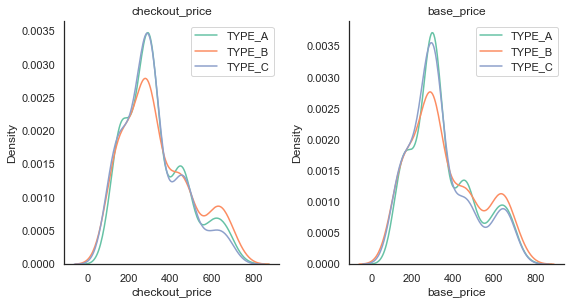

In [22]:
TYPE_A = df[df["center_type"] == "TYPE_A"]
TYPE_B = df[df["center_type"] == "TYPE_B"]
TYPE_C = df[df["center_type"] == "TYPE_C"]

plt.figure(figsize = (16,16))
for ax, col in enumerate(df.columns[4:6]):
    plt.subplot(4,4, ax + 1)# here 4,4 will result 4 graphs 
    plt.title(col)
    sns.kdeplot(x = TYPE_A[col], label = "TYPE_A")
    sns.kdeplot(x = TYPE_B[col], label = "TYPE_B")
    sns.kdeplot(x = TYPE_C[col], label = "TYPE_C")

    plt.legend()
plt.tight_layout()

In [23]:
df["cuisine"].unique()

array(['Thai', 'Italian', 'Indian', 'Continental'], dtype=object)

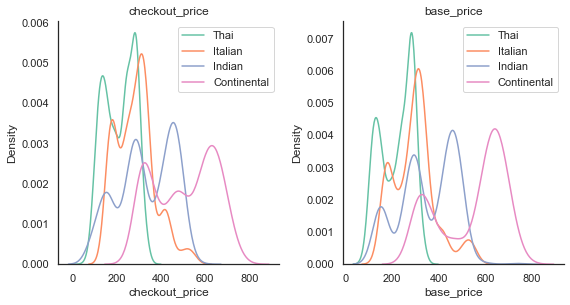

In [24]:
A = df[df["cuisine"] == "Thai"]
B = df[df["cuisine"] == "Italian"]
C = df[df["cuisine"] == "Indian"]
D = df[df["cuisine"] == "Continental"]

plt.figure(figsize = (16,16))
for ax, col in enumerate(df.columns[4:6]):
    plt.subplot(4,4, ax + 1)# here 4,4 will result 4 graphs 
    plt.title(col)
    sns.kdeplot(x = A[col], label = "Thai")
    sns.kdeplot(x = B[col], label = "Italian")
    sns.kdeplot(x = C[col], label = "Indian")
    sns.kdeplot(x = D[col], label = "Continental")


    plt.legend()
plt.tight_layout()

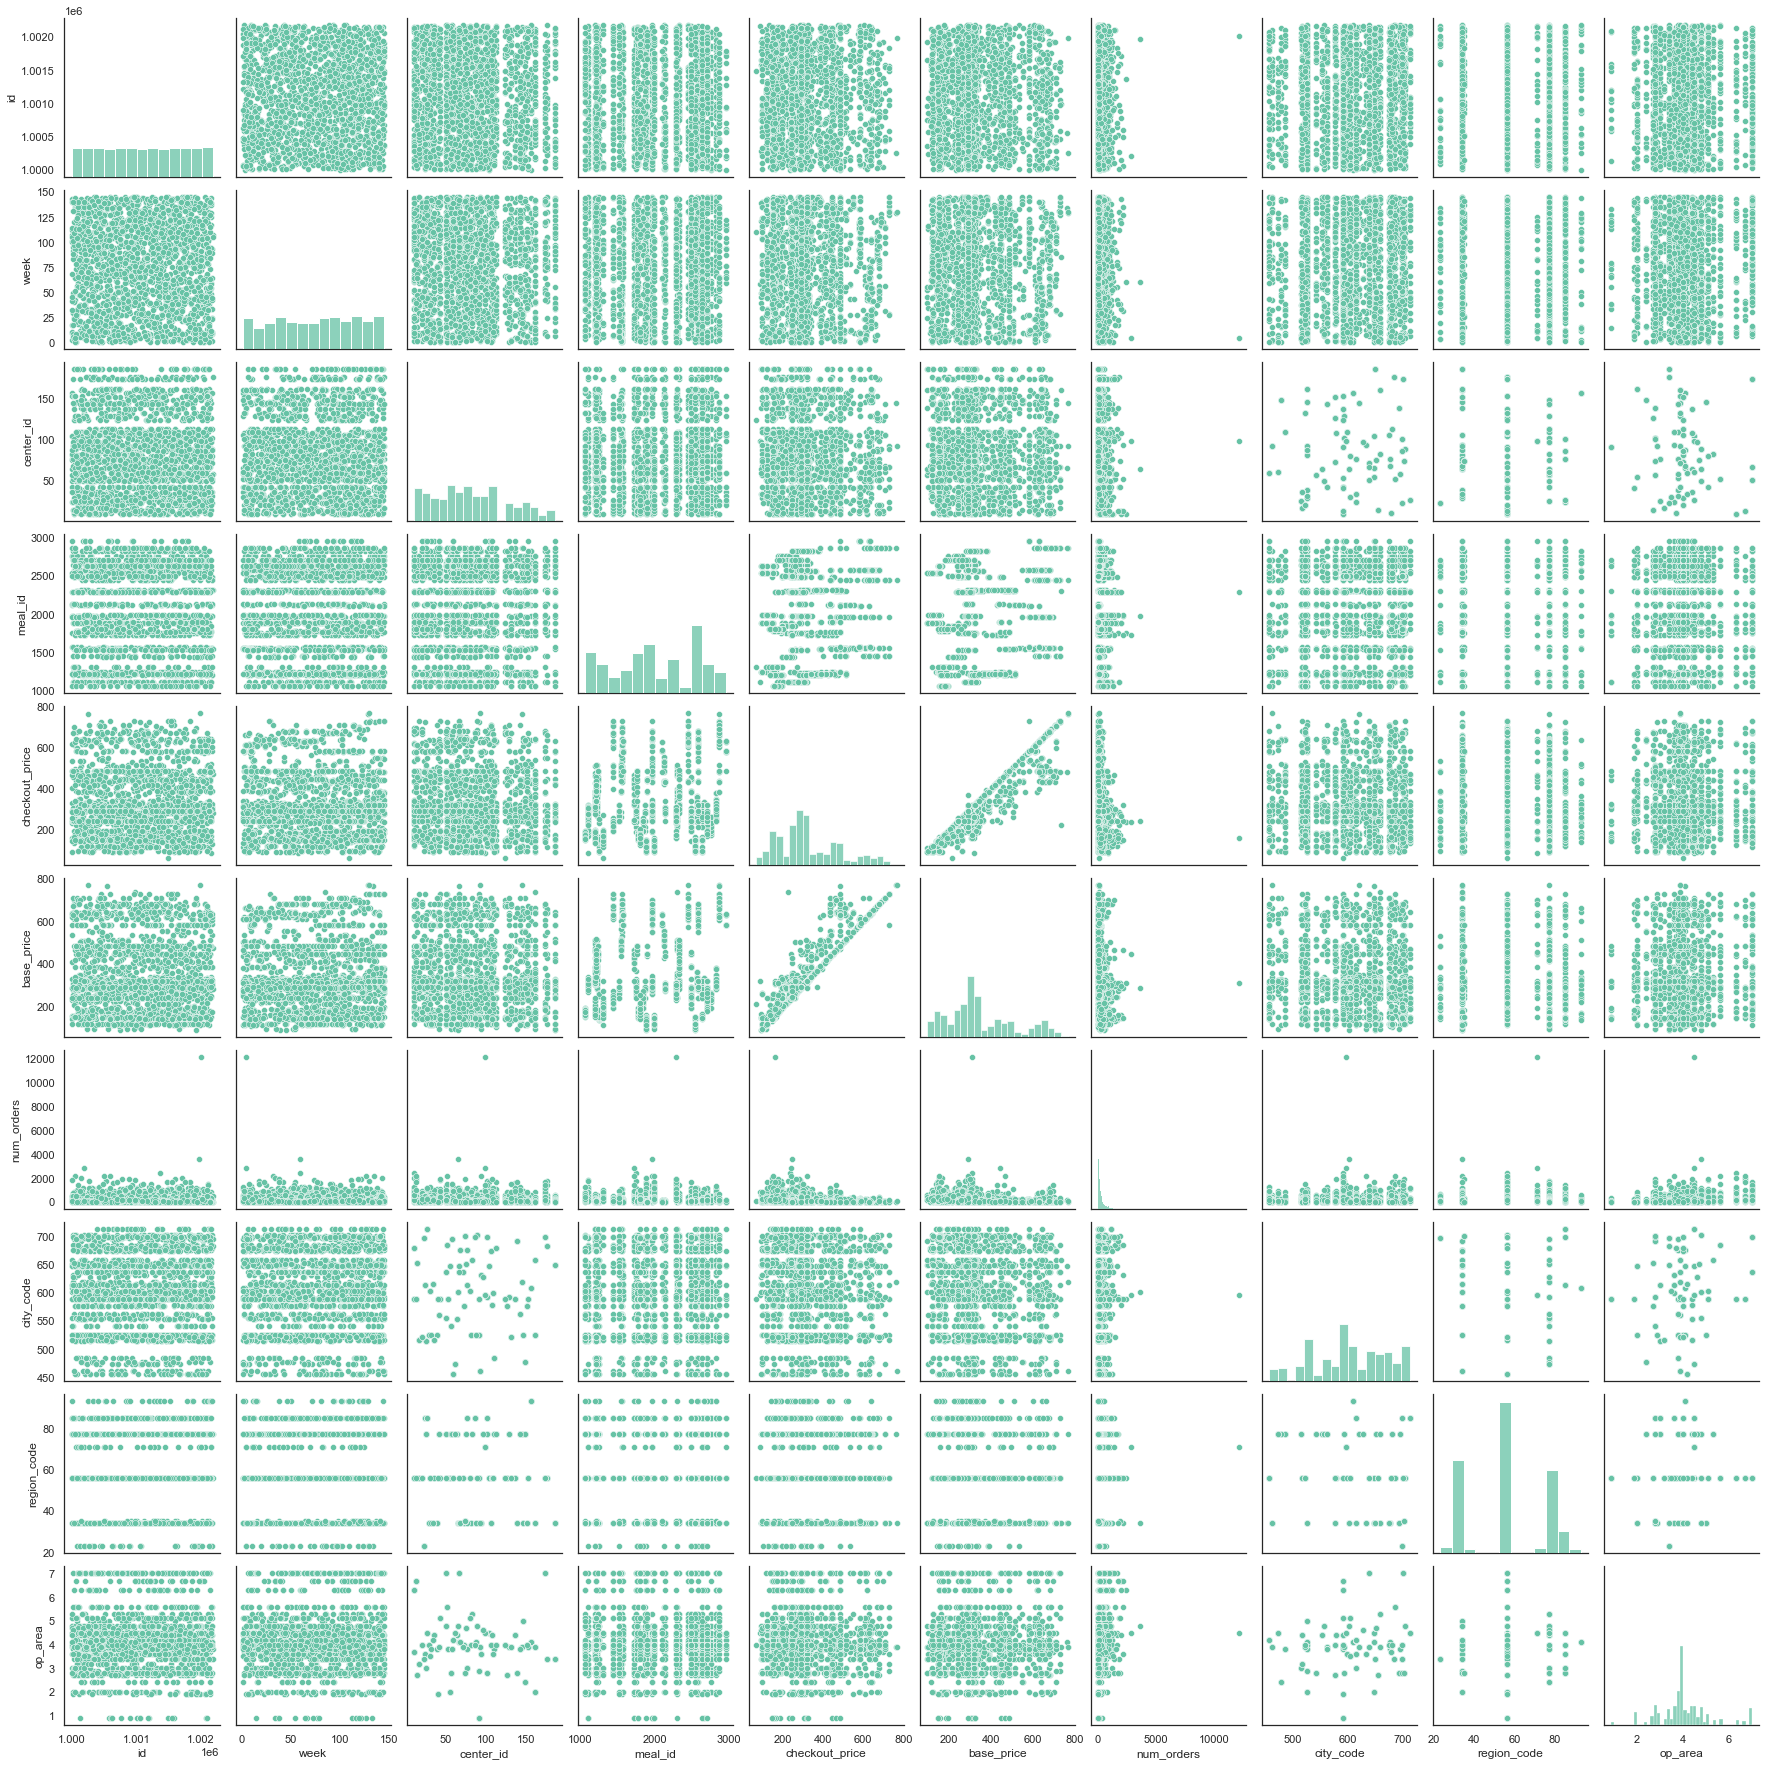

In [25]:
sns.pairplot(df)

<AxesSubplot:>

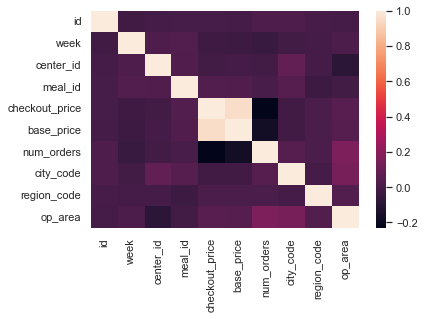

In [26]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cuisine']=le.fit_transform(df['cuisine'])
df['center_type']=le.fit_transform(df['center_type'])
df['category']=le.fit_transform(df['category'])


In [29]:
df

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1000000,3,157,2760,233.83,231.83,149,609,93,0,4.1,5,3
1,1001086,144,157,2760,184.36,261.93,96,609,93,0,4.1,5,3
2,1001863,120,157,2760,219.28,241.53,27,609,93,0,4.1,5,3
3,1000867,38,24,2760,242.53,242.53,204,614,85,1,3.6,5,3
4,1001080,131,83,2760,260.93,260.93,107,659,77,0,5.3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1001791,145,143,2104,582.03,581.03,69,562,77,1,3.8,4,0
1995,1001295,141,74,2104,582.03,581.03,14,702,35,0,2.8,4,0
1996,1000382,64,61,2104,629.53,631.53,41,473,77,0,4.5,4,0
1997,1001089,114,61,2104,588.79,590.79,82,473,77,0,4.5,4,0


In [30]:
df=df.drop(columns='id')

In [31]:
df

,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,3,157,2760,233.83,231.83,149,609,93,0,4.1,5,3
1,144,157,2760,184.36,261.93,96,609,93,0,4.1,5,3
2,120,157,2760,219.28,241.53,27,609,93,0,4.1,5,3
3,38,24,2760,242.53,242.53,204,614,85,1,3.6,5,3
4,131,83,2760,260.93,260.93,107,659,77,0,5.3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,145,143,2104,582.03,581.03,69,562,77,1,3.8,4,0
1995,141,74,2104,582.03,581.03,14,702,35,0,2.8,4,0
1996,64,61,2104,629.53,631.53,41,473,77,0,4.5,4,0
1997,114,61,2104,588.79,590.79,82,473,77,0,4.5,4,0


In [32]:
predictors =[ 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine']
outcome = 'num_orders'

X = df[predictors]
y = df[outcome]

# partition data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)  

In [33]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1599, 11)
(400, 11)
(1599,)
(400,)


In [34]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)

RandomForestRegressor()

In [35]:
# training
regressionSummary(train_y, rf.predict(train_X))
# validation
regressionSummary(test_y, rf.predict(test_X))


Regression statistics

                      Mean Error (ME) : -4.3113
       Root Mean Squared Error (RMSE) : 139.6324
            Mean Absolute Error (MAE) : 50.6919
          Mean Percentage Error (MPE) : -29.4344
Mean Absolute Percentage Error (MAPE) : 38.0004

Regression statistics

                      Mean Error (ME) : -32.0695
       Root Mean Squared Error (RMSE) : 234.1408
            Mean Absolute Error (MAE) : 135.8930
          Mean Percentage Error (MPE) : -95.6834
Mean Absolute Percentage Error (MAPE) : 116.0958


In [36]:
MSE=mean_squared_error(train_y,rf.predict(train_X))
MSE

19497.2014395247

In [37]:
r2=r2_score(train_y,rf.predict(train_X))
r2

0.8969755105214148

In [38]:
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [39]:
# training
regressionSummary(train_y, lr.predict(train_X))
# validation
regressionSummary(test_y, lr.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 404.2196
            Mean Absolute Error (MAE) : 195.1953
          Mean Percentage Error (MPE) : -160.8192
Mean Absolute Percentage Error (MAPE) : 219.4809

Regression statistics

                      Mean Error (ME) : 3.1304
       Root Mean Squared Error (RMSE) : 280.7624
            Mean Absolute Error (MAE) : 185.3807
          Mean Percentage Error (MPE) : -142.7065
Mean Absolute Percentage Error (MAPE) : 214.3767


In [40]:
MSE=mean_squared_error(train_y,lr.predict(train_X))
MSE

163393.50022405767

In [41]:
r2=r2_score(train_y,lr.predict(train_X))
r2

0.13661804249620557

In [42]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(train_X,train_y)

[23:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [43]:
# training
regressionSummary(train_y, xgb.predict(train_X))
# validation
regressionSummary(test_y, xgb.predict(test_X))


Regression statistics

                      Mean Error (ME) : 93.3079
       Root Mean Squared Error (RMSE) : 359.5107
            Mean Absolute Error (MAE) : 156.0619
          Mean Percentage Error (MPE) : -74.4509
Mean Absolute Percentage Error (MAPE) : 117.1119

Regression statistics

                      Mean Error (ME) : 90.4496
       Root Mean Squared Error (RMSE) : 291.5579
            Mean Absolute Error (MAE) : 160.9225
          Mean Percentage Error (MPE) : -80.4611
Mean Absolute Percentage Error (MAPE) : 124.5857


In [44]:
MSE=mean_squared_error(train_y,xgb.predict(train_X))
MSE

129247.90955415349

In [45]:
r2=r2_score(train_y,xgb.predict(train_X))
r2

0.31704558014169937

In [46]:
svm = SVR()
svm.fit(train_X,train_y)

SVR()

In [47]:
# training
regressionSummary(train_y, svm.predict(train_X))
# validation
regressionSummary(test_y, svm.predict(test_X))


Regression statistics

                      Mean Error (ME) : 115.6317
       Root Mean Squared Error (RMSE) : 448.8388
            Mean Absolute Error (MAE) : 193.9638
          Mean Percentage Error (MPE) : -106.4076
Mean Absolute Percentage Error (MAPE) : 158.1633

Regression statistics

                      Mean Error (ME) : 113.3291
       Root Mean Squared Error (RMSE) : 331.4003
            Mean Absolute Error (MAE) : 189.7209
          Mean Percentage Error (MPE) : -106.0646
Mean Absolute Percentage Error (MAPE) : 158.5903


In [48]:
MSE=mean_squared_error(train_y,svm.predict(train_X))
MSE

201456.23876258524

In [49]:
r2=r2_score(train_y,svm.predict(train_X))
r2

-0.06450796106137302

In [50]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_y)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_X, test_y)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 131.8716 degrees.
Accuracy = 23.35%.
Improvement of 45.09%.
